### Libraries

In [2]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sys
import os

# Specify the directory containing your module
module_dir = '/Users/gabrielvictorgomesferreira/artificial_intelligence/isu_classes/modules'

# Add the directory to sys.path if not already present
if module_dir not in sys.path:
    sys.path.append(module_dir)
    
from help_functions import *

### Config

In [3]:
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/Data/"
file_name = "spotify_songs.csv"

### Import Dataset

In [4]:
songs = pd.read_csv(data_loc + file_name)
rows, columns = songs.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
songs.head(1)

The dataset contains 32,833 rows and 23 columns


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0.0,0.0653,0.518,122.036,194754


### Data Preprocessing

#### Treating Duplicates

In [5]:
songs.drop(columns=['playlist_name', 'playlist_id'], inplace=True) #'playlist_genre', 'playlist_subgenre'

rows,columns = songs.shape

print(f'Rows: {rows:,}\nColumns: {columns}')

songs.head(1)

Rows: 32,833
Columns: 21


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0.0,0.0653,0.518,122.036,194754


In [6]:
songs.drop_duplicates(subset=['track_id'], inplace=True)

rows,columns = songs.shape

print(f'Rows: {rows:,}\nColumns: {columns}')

Rows: 28,356
Columns: 21


#### Treating Outliers

In [7]:
songs = songs[(songs.duration_ms > songs.duration_ms.quantile(0.01))]

rows,columns = songs.shape
print(f'Rows: {rows:,}\nColumns: {columns}')

Rows: 28,072
Columns: 21


#### Treating Nulls

In [8]:
songs.dropna(inplace=True)

rows,columns = songs.shape

print(f'Rows: {rows:,}\nColumns: {columns}')

Rows: 28,068
Columns: 21


#### Year Column

In [9]:
songs['track_album_release_date'] = standardize_date(songs['track_album_release_date'])
songs['year'] = songs['track_album_release_date'].dt.year
songs = songs.drop(columns=['track_album_release_date'])

#### Variable Encoding

In [10]:
# Create a LabelEncoder
encoder = LabelEncoder()
# songs['genre_label'] = encoder.fit_transform(songs['playlist_genre'])
songs['track_artist_label'] = encoder.fit_transform(songs['track_artist'])
songs['track_album_id_label'] = encoder.fit_transform(songs['track_album_id'])

mood_map = {
    'dance pop': 'Happy',
    'post-teen pop': 'Happy',
    'electropop': 'Happy',
    'indie poptimism': 'Relaxed',
    'hip hop': 'Energetic',
    'southern hip hop': 'Energetic',
    'gangster rap': 'Energetic',
    'trap': 'Energetic',
    'album rock': 'Energetic',
    'classic rock': 'Energetic',
    'permanent wave': 'Melancholic',
    'hard rock': 'Energetic',
    'tropical': 'Relaxed',
    'latin pop': 'Relaxed',
    'reggaeton': 'Happy',
    'latin hip hop': 'Happy',
    'urban contemporary': 'Melancholic',
    'hip pop': 'Relaxed',
    'new jack swing': 'Happy',
    'neo soul': 'Melancholic',
    'electro house': 'Energetic',
    'big room': 'Energetic',
    'pop edm': 'Happy',
    'progressive electro house': 'Energetic'
}

songs['mood'] = songs['playlist_subgenre'].map(mood_map)

# Define numeric encoding for moods
mood_numeric_map = {
    'Energetic': 0,
    'Happy': 1,
    'Melancholic': 2,
    'Relaxed': 3
}

# Apply the mapping to create a numeric mood column
songs['mood_numeric'] = songs['mood'].map(mood_numeric_map)


songs.head(1)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,track_artist_label,track_album_id_label,mood,mood_numeric
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0.0,0.0653,0.518,122.036,194754,2019,2757,8149,Happy,1


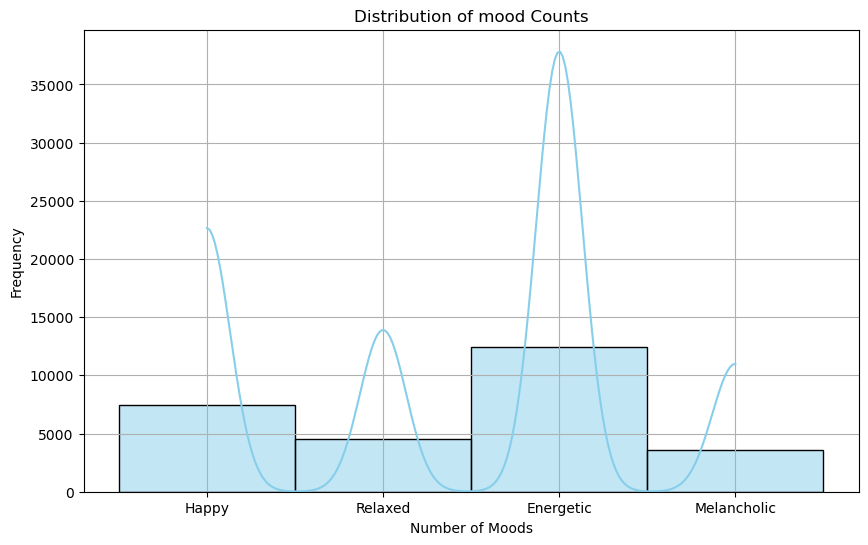

In [11]:
# Visualize the distribution of moods counts
plt.figure(figsize=(10, 6))
sns.histplot(songs['mood'], kde=True, color='skyblue')
plt.title('Distribution of mood Counts')
plt.xlabel('Number of Moods')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:
songs.head() 

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,track_artist_label,track_album_id_label,mood,mood_numeric
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,2757,8149,Happy,1
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,6032,17500,Happy,1
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,10341,3762,Happy,1
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,9146,5245,Happy,1
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,5357,21745,Happy,1


### Modeling

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer, f1_score, recall_score

#### Input Features

In [14]:
# Numeric Features
numeric_columns = songs.select_dtypes(include=['number']).columns
# print(numeric_columns)
print(f"There is {len(numeric_columns)} numerical features. \n")

# Input Data
X = songs[numeric_columns].drop(columns=['mood_numeric'])
y = songs['mood_numeric']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

print(f'Training set dimensions: {X_train.shape}, {y_train.shape}')
print(f'Testing set dimensions: {X_test.shape}, {y_test.shape}')
print("Unique labels in y_train:", (y_train.nunique()))
print("Unique labels in y_test:", (y_test.nunique()))

There is 17 numerical features. 

Training set dimensions: (22454, 16), (22454,)
Testing set dimensions: (5614, 16), (5614,)
Unique labels in y_train: 4
Unique labels in y_test: 4


### Logistic Regression

In [15]:
# Sore model results
results = []

# Scale input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Initialize the model
logit_model = LogisticRegression()
logit_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logit_model.predict(X_test_scaled)

# Evaluate model
lg_f1_score = f1_score(y_test, y_pred, average='weighted')
lg_recall_score = recall_score(y_test, y_pred, average='weighted')

# Cross validation using 5-fold cross-validation
lg_f1_cv_score = cross_val_score(logit_model, X_train_scaled, y_train, cv=5, scoring='f1_weighted').mean()
lg_recall_cv_score = cross_val_score(logit_model, X_train_scaled, y_train, cv=5, scoring='recall_weighted').mean()

results.append({"test_size": 0.2,
        "lg_f1_score": lg_f1_score,
        "lg_recall_score": lg_recall_score,
        "lg_f1_cv_score": lg_f1_cv_score,
        "lg_recall_cv_score": lg_recall_cv_score})

# Transform results into DF
results_df = pd.DataFrame(results)

# Display
results_df.head()

,test_size,lg_f1_score,lg_recall_score,lg_f1_cv_score,lg_recall_cv_score
0,0.2,0.472888,0.5057,0.469246,0.502361


In [16]:
# import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, f_regression, SelectFromModel
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Lasso, BayesianRidge, LassoCV, ElasticNetCV, RidgeCV, LogisticRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture
# from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
# from scipy.linalg import svd

In [17]:
# Applying the Lasso method for feature selection

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the Lasso model and SelectFromModel
lasso = Lasso(alpha=0.01, random_state=38)
selector = SelectFromModel(lasso)

# Fit the model to the scaled data
selector.fit(X_scaled, y)

# Transform the features to select the important ones
X_selected = selector.transform(X_scaled)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=38)

# Get the selected features
selected_features_mask = selector.get_support() 
selected_features = X.columns[selected_features_mask]

# Get the fitted Lasso model and coefficients
lasso_model = selector.estimator_
lasso_coefficients = np.abs(lasso_model.coef_)

# Rank the features based on their absolute coefficients
ranking = np.argsort(lasso_coefficients)[::-1]  # Sort in descending order

# Create a DataFrame to display feature names along with their coefficients
feature_importance_df = pd.DataFrame({
    'Feature': X.columns[ranking],
    'Coefficient': lasso_coefficients[ranking]
})

# Filter to show only features with coefficients greater than 0.02
non_zero_features_df = feature_importance_df[feature_importance_df['Coefficient'] > 0.02]

# Display the DataFrame of ranked features and their coefficients
print("Ranked Features with by Coefficients:")
print(non_zero_features_df)

Ranked Features with by Coefficients:
            Feature  Coefficient
0              year     0.221605
1       speechiness     0.195122
2            energy     0.169221
3           valence     0.161948
4  instrumentalness     0.135619
5      acousticness     0.133462
6             tempo     0.056407
7      danceability     0.054656
8  track_popularity     0.048359
9              mode     0.026648


In [18]:
# Split data into features (X) and target variable (y)
X = X[selected_features]

# Initialize lists to store the metrics
results = []

# Define models
models = {
    "NaiveBayes": GaussianNB(),
    "MLP": MLPClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(), 
    # "LightGBM": LGBMClassifier(verbose=-1), 
    "SVC": SVC(probability=True), 
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "GradientBoosting": GradientBoostingClassifier()
}

# Test set sizes to iterate over
test_sizes = [0.3]
i=0
# Iterate over each test size
for test_size in test_sizes:
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=45)

    # Scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)  
    X_test_scaled = scaler.transform(X_test)

    # Iterate over each model
    for model_name, model in models.items():
        
        # Train the model on the scaled training set
        model.fit(X_train_scaled, y_train)

        # Predictions on training set
        y_train_pred = model.predict(X_train_scaled)

        # Predictions on test set
        y_test_pred = model.predict(X_test_scaled)

        # Accuracy Scores for training and test sets
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        
        # Cross-validation using Accuracy Scores
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        cv_accuracy_mean = cv_scores.mean()  
        cv_accuracy_std = cv_scores.std()    

        # Store the results in a dictionary
        results.append({
            'Model': model_name,
            'Test_Size': test_size,
            'Train_Accuracy': round(train_acc,4),
            'Test_Accuracy': round(test_acc,4),
            'CV_Accuracy_Mean': round(cv_accuracy_mean,4),
            'CV_Accuracy_Std': round(cv_accuracy_std,4)
        })

        print(results[i])
        i+=1

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(results)

# Display the metrics sorted by Test Accuracy
metrics_df.sort_values(by='Test_Accuracy', ascending=False, inplace=True)

# Show the resulting DataFrame
metrics_df

{'Model': 'NaiveBayes', 'Test_Size': 0.3, 'Train_Accuracy': 0.4696391306560798, 'Test_Accuracy': 0.4697779361121007, 'CV_Accuracy_Mean': 0.4685194518220034, 'CV_Accuracy_Std': 0.0060678409254350816}
{'Model': 'MLP', 'Test_Size': 0.3, 'Train_Accuracy': 0.6051814526390797, 'Test_Accuracy': 0.5559909749435934, 'CV_Accuracy_Mean': 0.5639021253198472, 'CV_Accuracy_Std': 0.006273028415941213}
{'Model': 'AdaBoost', 'Test_Size': 0.3, 'Train_Accuracy': 0.5440016287473914, 'Test_Accuracy': 0.53081581759886, 'CV_Accuracy_Mean': 0.5337201613629196, 'CV_Accuracy_Std': 0.0027086408062924113}
{'Model': 'LinearDiscriminantAnalysis', 'Test_Size': 0.3, 'Train_Accuracy': 0.49966916068610984, 'Test_Accuracy': 0.49815936349602186, 'CV_Accuracy_Mean': 0.49875310942252976, 'CV_Accuracy_Std': 0.0025187101215821866}
{'Model': 'SVC', 'Test_Size': 0.3, 'Train_Accuracy': 0.5858909757214842, 'Test_Accuracy': 0.5584847405296283, 'CV_Accuracy_Mean': 0.5619682830806614, 'CV_Accuracy_Std': 0.0047005736485076915}
{'Mod

,Model,Test_Size,Train_Accuracy,Test_Accuracy,CV_Accuracy_Mean,CV_Accuracy_Std
5,RandomForest,0.3,0.999949,0.583660,0.584720,0.003599
8,GradientBoosting,0.3,0.606963,0.571191,0.571690,0.004296
4,SVC,0.3,0.585891,0.558485,0.561968,0.004701
1,MLP,0.3,0.605181,0.555991,0.563902,0.006273
2,AdaBoost,0.3,0.544002,0.530816,0.533720,0.002709
6,KNN,0.3,0.659337,0.514072,0.521911,0.003592
3,LinearDiscriminantAnalysis,0.3,0.499669,0.498159,0.498753,0.002519
7,QDA,0.3,0.491831,0.483434,0.488471,0.003635
0,NaiveBayes,0.3,0.469639,0.469778,0.468519,0.006068


In [21]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)

# Create and fit the gb model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions
gb_pred = gb_model.predict(X_test)
gb_pred_train = gb_model.predict(X_train)

# Evaluate the model with original categorical values
gb_accuracy = accuracy_score(y_test, gb_pred)
precision = precision_score(y_test, gb_pred, average='weighted')
recall = recall_score(y_test, gb_pred, average='weighted')
f1 = f1_score(y_test, gb_pred, average='weighted')
gb_clf_report_original = classification_report(y_test, gb_pred)

# Display results
print('Best Model - gb Test Scores:')
print(f'Accuracy: {gb_accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(' ')
print(gb_clf_report_original)

Best Model - gb Test Scores:
Accuracy: 0.57
Precision: 0.55
Recall: 0.57
F1 Score: 0.55
 
              precision    recall  f1-score   support

           0       0.63      0.82      0.71      6144
           1       0.52      0.47      0.49      3765
           2       0.49      0.25      0.33      1832
           3       0.46      0.32      0.38      2293

    accuracy                           0.57     14034
   macro avg       0.52      0.47      0.48     14034
weighted avg       0.55      0.57      0.55     14034

